In [2]:
#pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 26.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.1
    Uninstalling scipy-1.9.1:
      Successfully uninstalled scipy-1.9.1
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os

def load_data(path):
    texts, labels = [], []
    for label_type in ['neg', 'pos']:
        dir_name = os.path.join(path, label_type)
        file_count = 0
        for fname in os.listdir(dir_name):
            if fname.endswith(".txt"):
                with open(os.path.join(dir_name, fname), 'r') as f:
                    texts.append(f.read())
                    if label_type == 'neg':
                        labels.append(0)
                    else:
                        labels.append(1)
                file_count += 1
        print(f"Read {file_count} files from {dir_name}")
    return texts, labels

In [ ]:
#test_texts, test_labels = load_data('/content/drive/MyDrive/Datasets/aclImdb/test/')

In [6]:
train_texts, train_labels = load_data('/Users/ankitbatchali/Downloads/aclImdb/train/')
test_texts, test_labels = load_data('/Users/ankitbatchali/Downloads/aclImdb/test/')

Read 12500 files from /Users/ankitbatchali/Downloads/aclImdb/train/neg
Read 12500 files from /Users/ankitbatchali/Downloads/aclImdb/train/pos
Read 12500 files from /Users/ankitbatchali/Downloads/aclImdb/test/neg
Read 12500 files from /Users/ankitbatchali/Downloads/aclImdb/test/pos


In [ ]:
#print(os.listdir('/content/drive/MyDrive/Datasets/aclImdb/test/'))


['urls_neg.txt', 'urls_pos.txt', 'neg', 'pos', 'labeledBow.feat']


In [7]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_texts(texts):
    # Convert to lowercase
    texts = [text.lower() for text in texts]
    # Remove stopwords
    texts = [' '.join(word for word in text.split() if word not in stop_words) for text in texts]
    return texts

train_texts = preprocess_texts(train_texts)
test_texts = preprocess_texts(test_texts)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ankitbatchali/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
print(len(test_texts))

25000


In [9]:
#Vectorization
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

In [10]:
clf = MultinomialNB()
clf.fit(X_train, train_labels)

MultinomialNB()

In [13]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(test_labels, y_pred))
print(classification_report(test_labels, y_pred))

Accuracy: 0.83296
              precision    recall  f1-score   support

           0       0.80      0.88      0.84     12500
           1       0.87      0.78      0.82     12500

    accuracy                           0.83     25000
   macro avg       0.84      0.83      0.83     25000
weighted avg       0.84      0.83      0.83     25000



In [2]:
import pandas as pd
import os

base_path = '/Users/ankitbatchali/Downloads/aclImdb'
labels = {'pos': 1, 'neg': 0}
dfs = []

for dataset in ['train', 'test']:
    for label, sentiment in labels.items():
        path = os.path.join(base_path, dataset, label)
        for file_name in os.listdir(path):
            with open(os.path.join(path, file_name), 'r', encoding='utf-8') as f:
                text = f.read()
                rating = file_name.split("_")[1].split(".")[0]
                dfs.append([text, sentiment, rating])
                
df = pd.DataFrame(dfs, columns=['review', 'sentiment', 'rating'])

# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

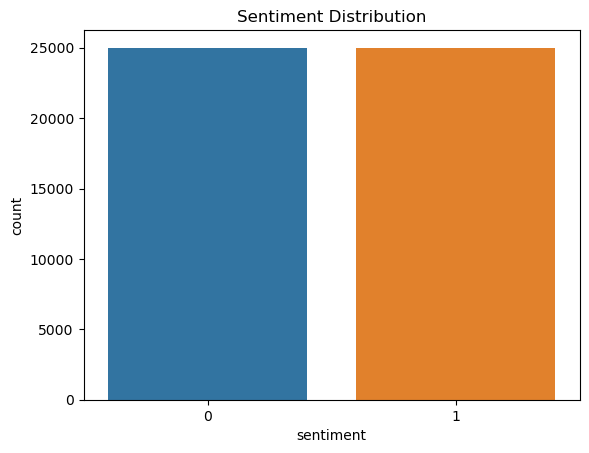

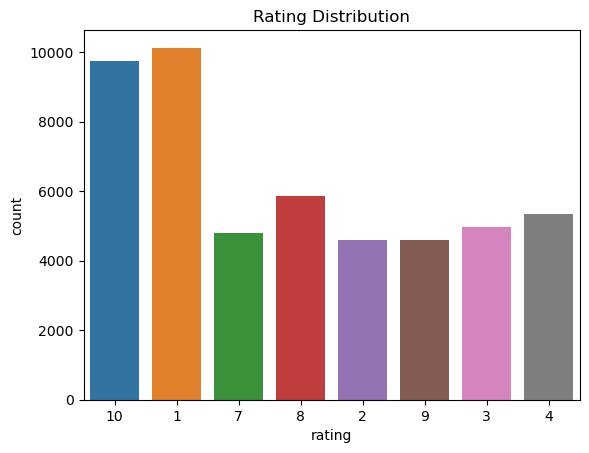

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['sentiment'])
plt.title('Sentiment Distribution')
plt.show()

sns.countplot(x=df['rating'])
plt.title('Rating Distribution')
plt.show()

In [4]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ankitbatchali/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z]', ' ', text)
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

df['review'] = df['review'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ankitbatchali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ankitbatchali/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df['review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tf, y_train)

y_pred = lr.predict(X_test_tf)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8891333333333333
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      7489
           1       0.88      0.90      0.89      7511

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Tokenization
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding
X_train_pad = pad_sequences(X_train_seq, maxlen=100, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=100, padding='post', truncating='post')

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 64, input_length=100),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(X_train_pad, y_train, epochs=5, validation_data=(X_test_pad, y_test))


2023-10-01 22:53:16.949497: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-10-01 22:53:16.949524: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-10-01 22:53:16.949530: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-10-01 22:53:16.949587: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-01 22:53:16.949626: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           320000    
                                                                 
 lstm (LSTM)                 (None, 100, 64)           33024     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 365473 (1.39 MB)
Trainable params: 365473 (1.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5


2023-10-01 22:53:20.300360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1094/1094 [==============================] - 101s 83ms/step - loss: 0.6689 - accuracy: 0.5774 - val_loss: 0.6726 - val_accuracy: 0.5630
Epoch 2/5
1094/1094 [==============================] - 40s 37ms/step - loss: 0.5499 - accuracy: 0.7123 - val_loss: 0.3816 - val_accuracy: 0.8339
Epoch 3/5
1094/1094 [==============================] - 37s 34ms/step - loss: 0.3341 - accuracy: 0.8576 - val_loss: 0.3434 - val_accuracy: 0.8463
Epoch 4/5
1094/1094 [==============================] - 35s 32ms/step - loss: 0.2790 - accuracy: 0.8867 - val_loss: 0.3259 - val_accuracy: 0.8633
Epoch 5/5
1094/1094 [==============================] - 34s 31ms/step - loss: 0.2469 - accuracy: 0.9004 - val_loss: 0.3385 - val_accuracy: 0.8540


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers

# Tokenization
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding
X_train_pad = pad_sequences(X_train_seq, maxlen=100, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=100, padding='post', truncating='post')

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 128, input_length=100), # Increased embedding dimensions
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True, kernel_regularizer=regularizers.l2(0.01))), # Added bidirectional layer and L2 regularization
    tf.keras.layers.Dropout(0.5), # Added Dropout layer
    tf.keras.layers.LSTM(64, kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='tanh') # Changed activation to tanh
])

optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001) # Use legacy RMSprop optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy')
lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)

model.fit(X_train_pad, y_train, epochs=20, batch_size=64, validation_data=(X_test_pad, y_test), 
          callbacks=[early_stop, checkpoint, lr_schedule])


Epoch 1/20
547/547 [==============================] - 284s 490ms/step - loss: 1.0329 - accuracy: 0.7689 - val_loss: 0.3919 - val_accuracy: 0.8523 - lr: 0.0010
Epoch 2/20


/Users/ankitbatchali/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


547/547 [==============================] - 212s 388ms/step - loss: 0.3930 - accuracy: 0.8560 - val_loss: 0.3631 - val_accuracy: 0.8493 - lr: 0.0010
Epoch 3/20
547/547 [==============================] - 204s 374ms/step - loss: 0.5103 - accuracy: 0.8624 - val_loss: 0.5158 - val_accuracy: 0.8435 - lr: 0.0010
Epoch 4/20
547/547 [==============================] - 207s 378ms/step - loss: 0.3902 - accuracy: 0.8728 - val_loss: 0.3395 - val_accuracy: 0.8653 - lr: 0.0010
Epoch 5/20
547/547 [==============================] - 205s 375ms/step - loss: 0.3705 - accuracy: 0.8761 - val_loss: 0.3801 - val_accuracy: 0.8635 - lr: 0.0010
Epoch 6/20
398/547 [====================>.........] - ETA: 42s - loss: 0.5623 - accuracy: 0.8787

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
X_train_enc = tokenizer(X_train.tolist(), padding=True, truncation=True, return_tensors='tf', max_length=100)
X_test_enc = tokenizer(X_test.tolist(), padding=True, truncation=True, return_tensors='tf', max_length=100)

model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')
optimizer = Adam(learning_rate=5e-5)
model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy'])
model.summary()

model.fit(X_train_enc.data, y_train, epochs=3, validation_data=(X_test_enc.data, y_test))
